In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import os
import sys
from sklearn.model_selection import train_test_split

In [2]:
sys.path.append('/home/alessia/Tirocinio/Fuzzy-C-master')

In [3]:
from FCM import *

In [5]:
dataset=pd.read_csv("iris-setosa.csv")
X = dataset[["sepal_length", "sepal_width"]].values
y = dataset["species"].values
print("features:\n", X, "\nLabels:\n ", y)

features:
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]

In [6]:
from sklearn.preprocessing import StandardScaler
iris_values_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)

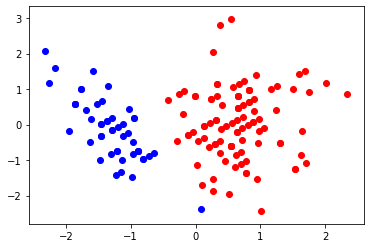

In [7]:
#stampa
%matplotlib inline
import matplotlib.pyplot as plt

def gr_dataset(): 
    for lab, col in zip((1, 0),
                        ('blue', 'red')):
        plt.scatter(iris_values_2d[y==lab, 0],
                    iris_values_2d[y==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [8]:
def gr_membership_contour(estimated_membership):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([estimated_membership((x, y))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    membership_contour = plt.contour(X, Y, Z,
                                     levels=(.1, .3, .5, .95), colors='k')
    plt.clabel(membership_contour, inline=1)

In [9]:
def generator(m):
    return (-4 + np.random.random(2*m) * 8).reshape((m, 2))

In [50]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y, test_size=80)
model = FCM()

train_membership, centers = model.fuzzy_train(xTrain , 2 , 2)

test_membership = model.fuzzy_predict(xTest , 2 , centers, 2)

ValueError: test_size=80 should be either positive and smaller than the number of samples 80 or a float in the (0, 1) range

In [47]:
test_membership=np.array(test_membership)
ascisse = [i[0] for i in xTest]
ordinate = [i[1] for i in xTest]

TypeError: Shape of x does not match that of z: found (80, 80) instead of (38, 2).

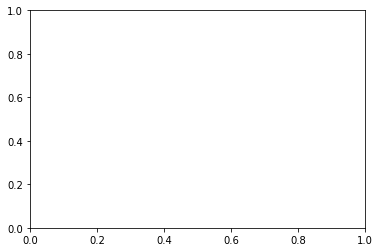

In [49]:
x = np.arange(-4, 4, .1)
y = np.arange(-4, 4, .1)
X, Y = np.meshgrid(x, y)
#zs = np.array([estimated_membership((x, y)) for x,y in zip(np.ravel(X), np.ravel(Y))])
#Z = zs.reshape(X.shape)
membership_contour = plt.contour(X, Y, test_membership, levels=(.1, .3, .5, .95), colors='k')
plt.clabel(membership_contour, inline=1)

In [ ]:
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(test_membership)
plt.show()